# 卒業研究7：実験から得られるものに近いデータについて
今後はテストデータに実験から取れるデータを用いて行きたいので，そのための準備を行う．
#### 坂西和也

# データの読み込み


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
data_path = '/home/taichi/Documents/BANZAI/masuda/'
data_mark = pd.read_csv(data_path + 'AbExist.csv' , delimiter=r'\t')
# 列名を修正
data_mark = data_mark.rename(columns={'"S8SVel02Scaled': 'S8SVel02Scaled', 'S8SRuma030"': 'S8SRuma030'})

# 余分なダブルクォーテーションを取り除く
data_mark["S8SVel02Scaled"] = data_mark["S8SVel02Scaled"].str.replace('"', '').astype(float)
data_mark["S8SRuma030"] = data_mark["S8SRuma030"].str.replace('"', '').astype(int)

/tmp/ipykernel_3291352/2005016627.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_mark = pd.read_csv(data_path + 'AbExist.csv' , delimiter=r'\t')


In [16]:
# CSVファイルを読み込む
data_path = '/home/taichi/Documents/BANZAI/masuda/'
noab_data = pd.read_csv(data_path + 'NoAb.csv', delimiter=r'\t')
# 列名を修正
noab_data = noab_data.rename(columns={'"S8SV02Scaled': 'S8SV02Scaled', 'S8SEr005"': 'S8SEr005'})

# 余分なダブルクォーテーションを取り除く
noab_data["S8SV02Scaled"] = noab_data["S8SV02Scaled"].str.replace('"', '').astype(float)
noab_data["S8SEr005"] = noab_data["S8SEr005"].str.replace('"', '').astype(int)

/tmp/ipykernel_3291352/2462224882.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  noab_data = pd.read_csv(data_path + 'NoAb.csv', delimiter=r'\t')


In [14]:
data_mark.head()

,S8SVel02Scaled,S8SRuma003,S8SRuma006,S8SRuma009,S8SRuma012,S8SRuma015,S8SRuma018,S8SRuma021,S8SRuma024,S8SRuma027,S8SRuma030
0,-27.206436,431,866,1422,1989,2510,3048,3514,4143,4676,5029
1,-27.190086,366,785,1333,1839,2354,2865,3354,3929,4476,4865
2,-27.157355,344,787,1332,1844,2366,2904,3395,4005,4568,4956
3,-27.108253,373,785,1327,1895,2336,2851,3274,3859,4397,4792
4,-27.042823,367,792,1295,1795,2299,2816,3250,3856,4423,4788


In [17]:
noab_data.head()

,S8SV02Scaled,S8SEr003,S8SEr004,S8SEr005
0,-53.892207,626.0,1332,2659
1,-53.043510,584.0,1217,2506
2,-52.194814,650.0,1326,2613
3,-51.346118,586.0,1249,2533
4,-50.497422,644.0,1296,2546


In [18]:
print(len(data_mark))
print(len(noab_data))

128
128


# データの可視化

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

## ピークの見えるデータ

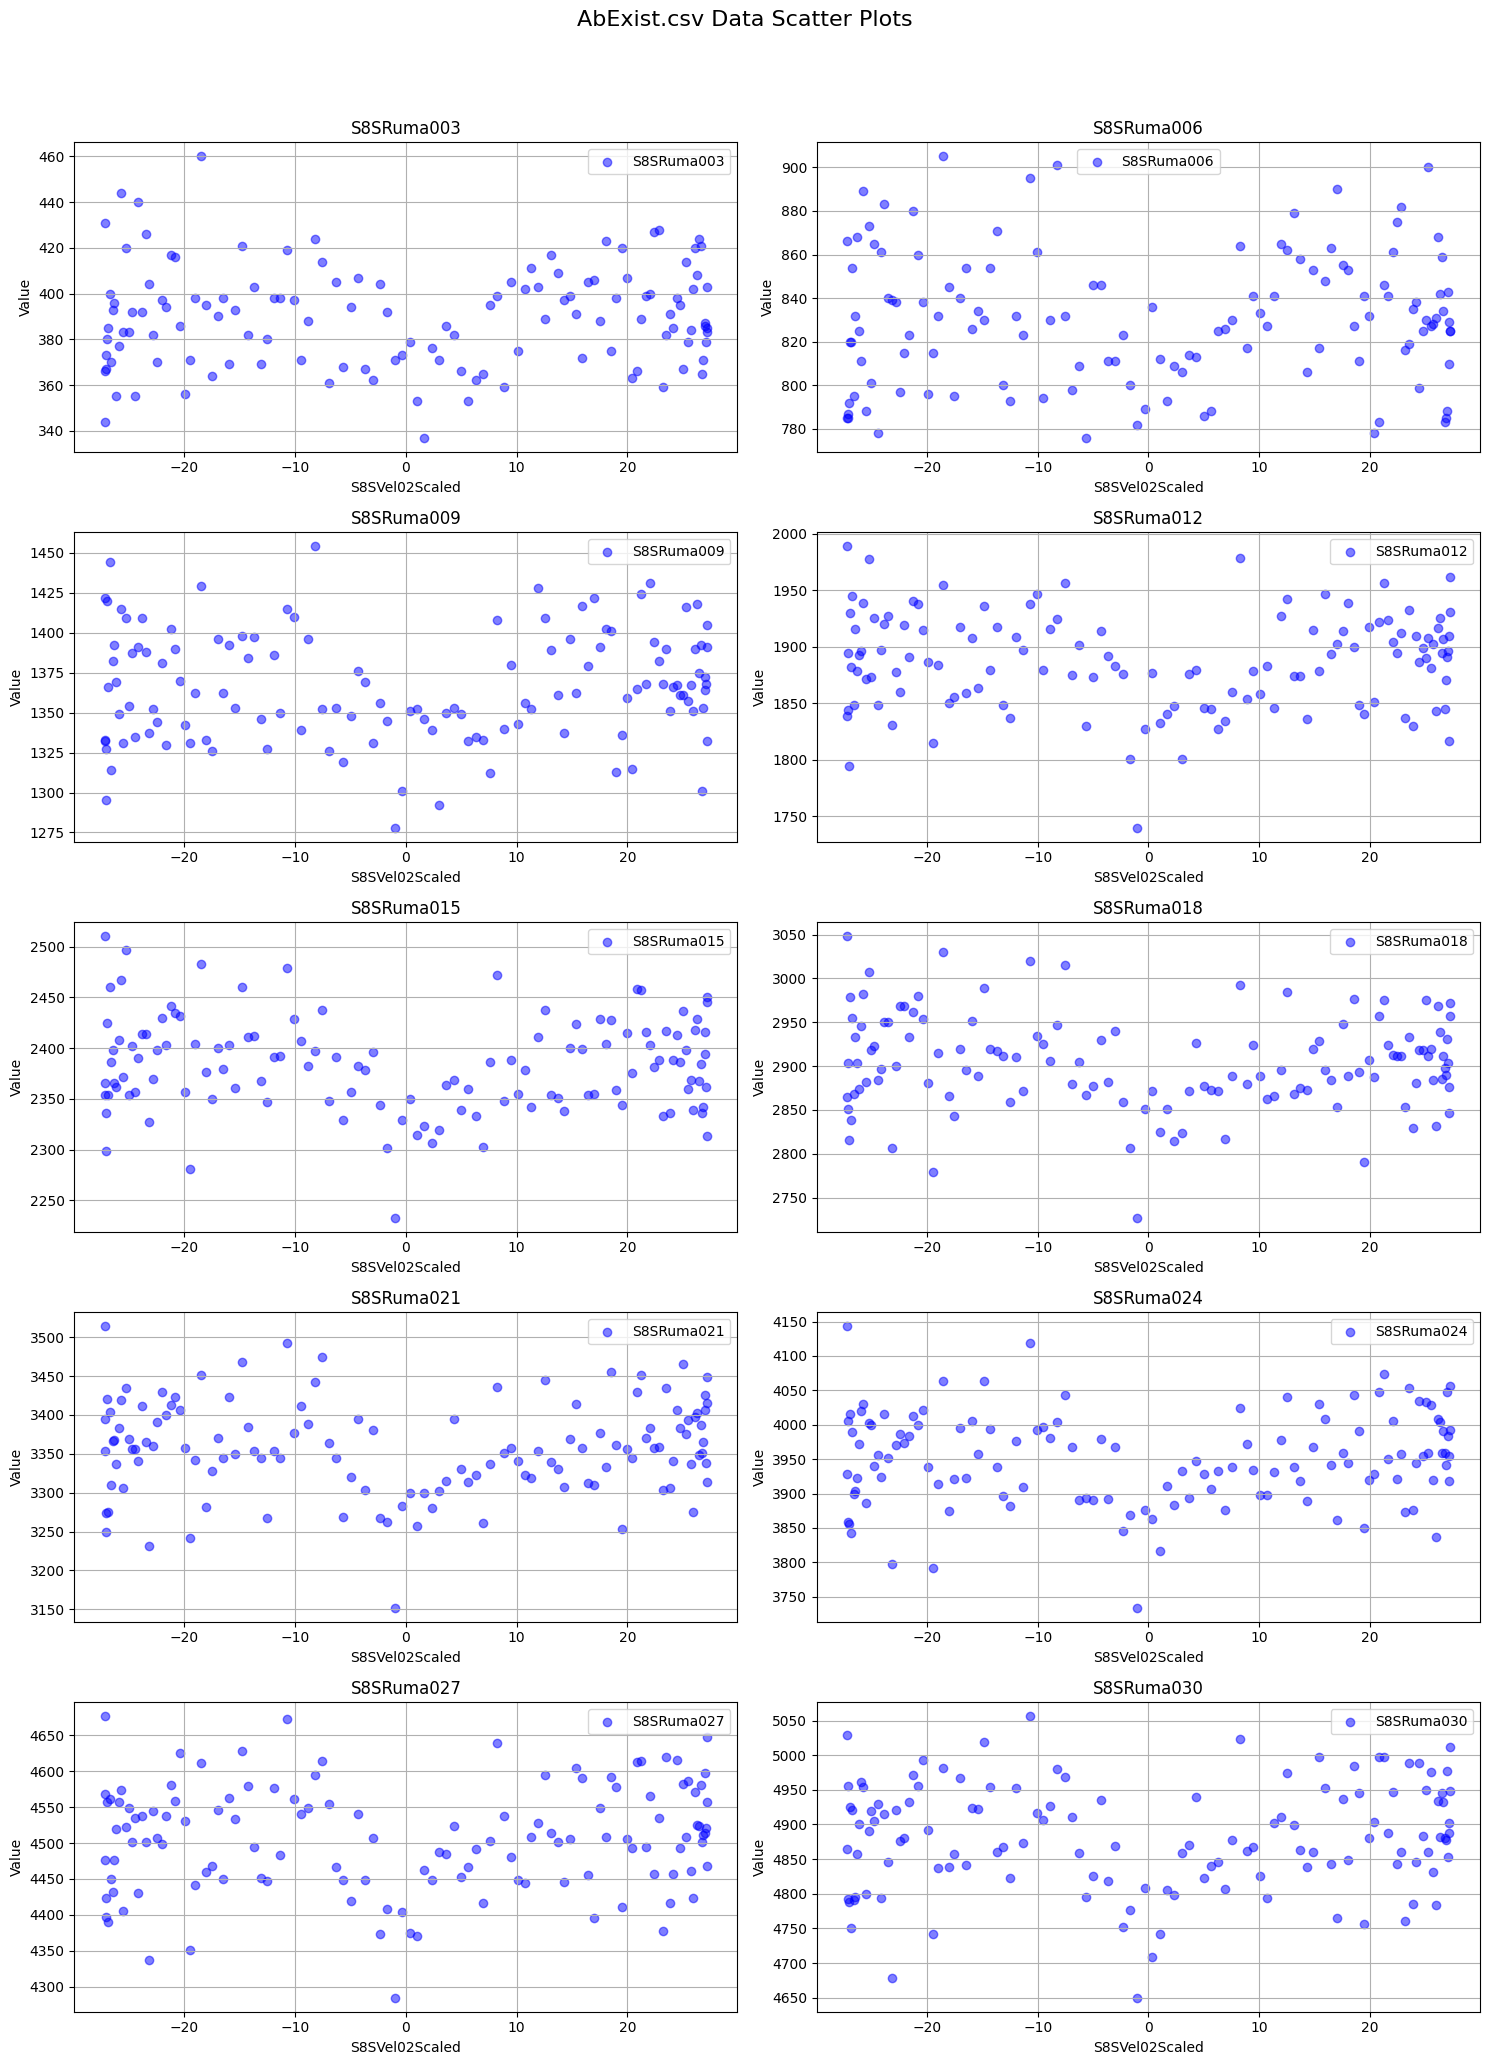

In [23]:
# AbExist.csvのデータを散布図で可視化
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('AbExist.csv Data Scatter Plots', fontsize=16, y=1.03)
x = data_mark['S8SVel02Scaled']
for i, ax in enumerate(axs.flat):
    ax.scatter(x, data_mark[columns[i]], label=columns[i], color='b', alpha=0.5)
    ax.set_title(columns[i])
    ax.set_xlabel('S8SVel02Scaled')
    ax.set_ylabel('Value')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

## ピークの見えないデータ

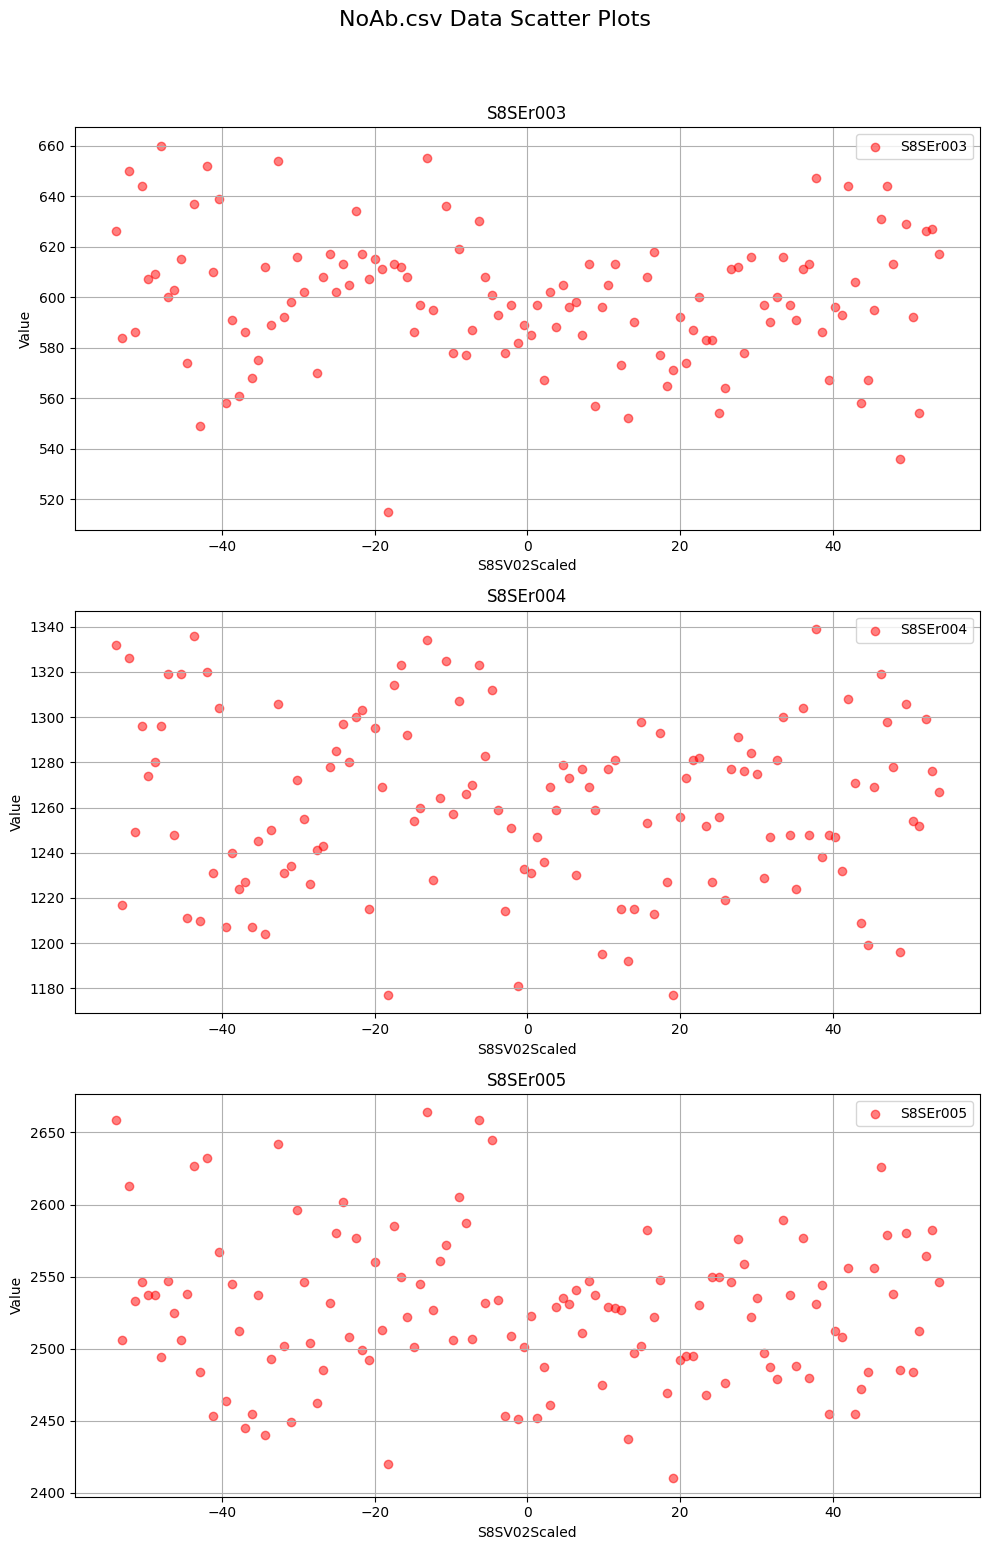

In [25]:
# NoAb.csvのデータを散布図で可視化
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle('NoAb.csv Data Scatter Plots', fontsize=16, y=1.03)
x_noab = noab_data['S8SV02Scaled']
columns_noab = noab_data.columns[1:]
for i, ax in enumerate(axs):
    ax.scatter(x_noab, noab_data[columns_noab[i]], label=columns_noab[i], color='r', alpha=0.5)
    ax.set_title(columns_noab[i])
    ax.set_xlabel('S8SV02Scaled')
    ax.set_ylabel('Value')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

# ピークの見えないデータの観察

In [26]:
# 各カラムの標本平均値と標本分散を算出
mean_values = noab_data.mean()
variance_values = noab_data.var()

print("Mean values:")
print(mean_values)

print("\nVariance values:")
print(variance_values)

Mean values:
S8SV02Scaled   -1.110223e-16
S8SEr003        5.988710e+02
S8SEr004        1.261945e+03
S8SEr005        2.526227e+03
dtype: float64

Variance values:
S8SV02Scaled     991.112414
S8SEr003         674.958825
S8SEr004        1437.044230
S8SEr005        2664.334092
dtype: float64


## 正規乱数であるかを確認したい
### 視覚的検証
ヒストグラム: データの分布を視覚的に確認するためのツール．もしデータが正規分布に従っている場合，ヒストグラムはベル形状の曲線になることが期待される．

Q-Qプロット (Quantile-Quantile Plot): このプロットは，データの分位数と正規分布の分位数を比較します．データが正規分布に従っている場合，プロットの点は直線に沿うことが期待される．

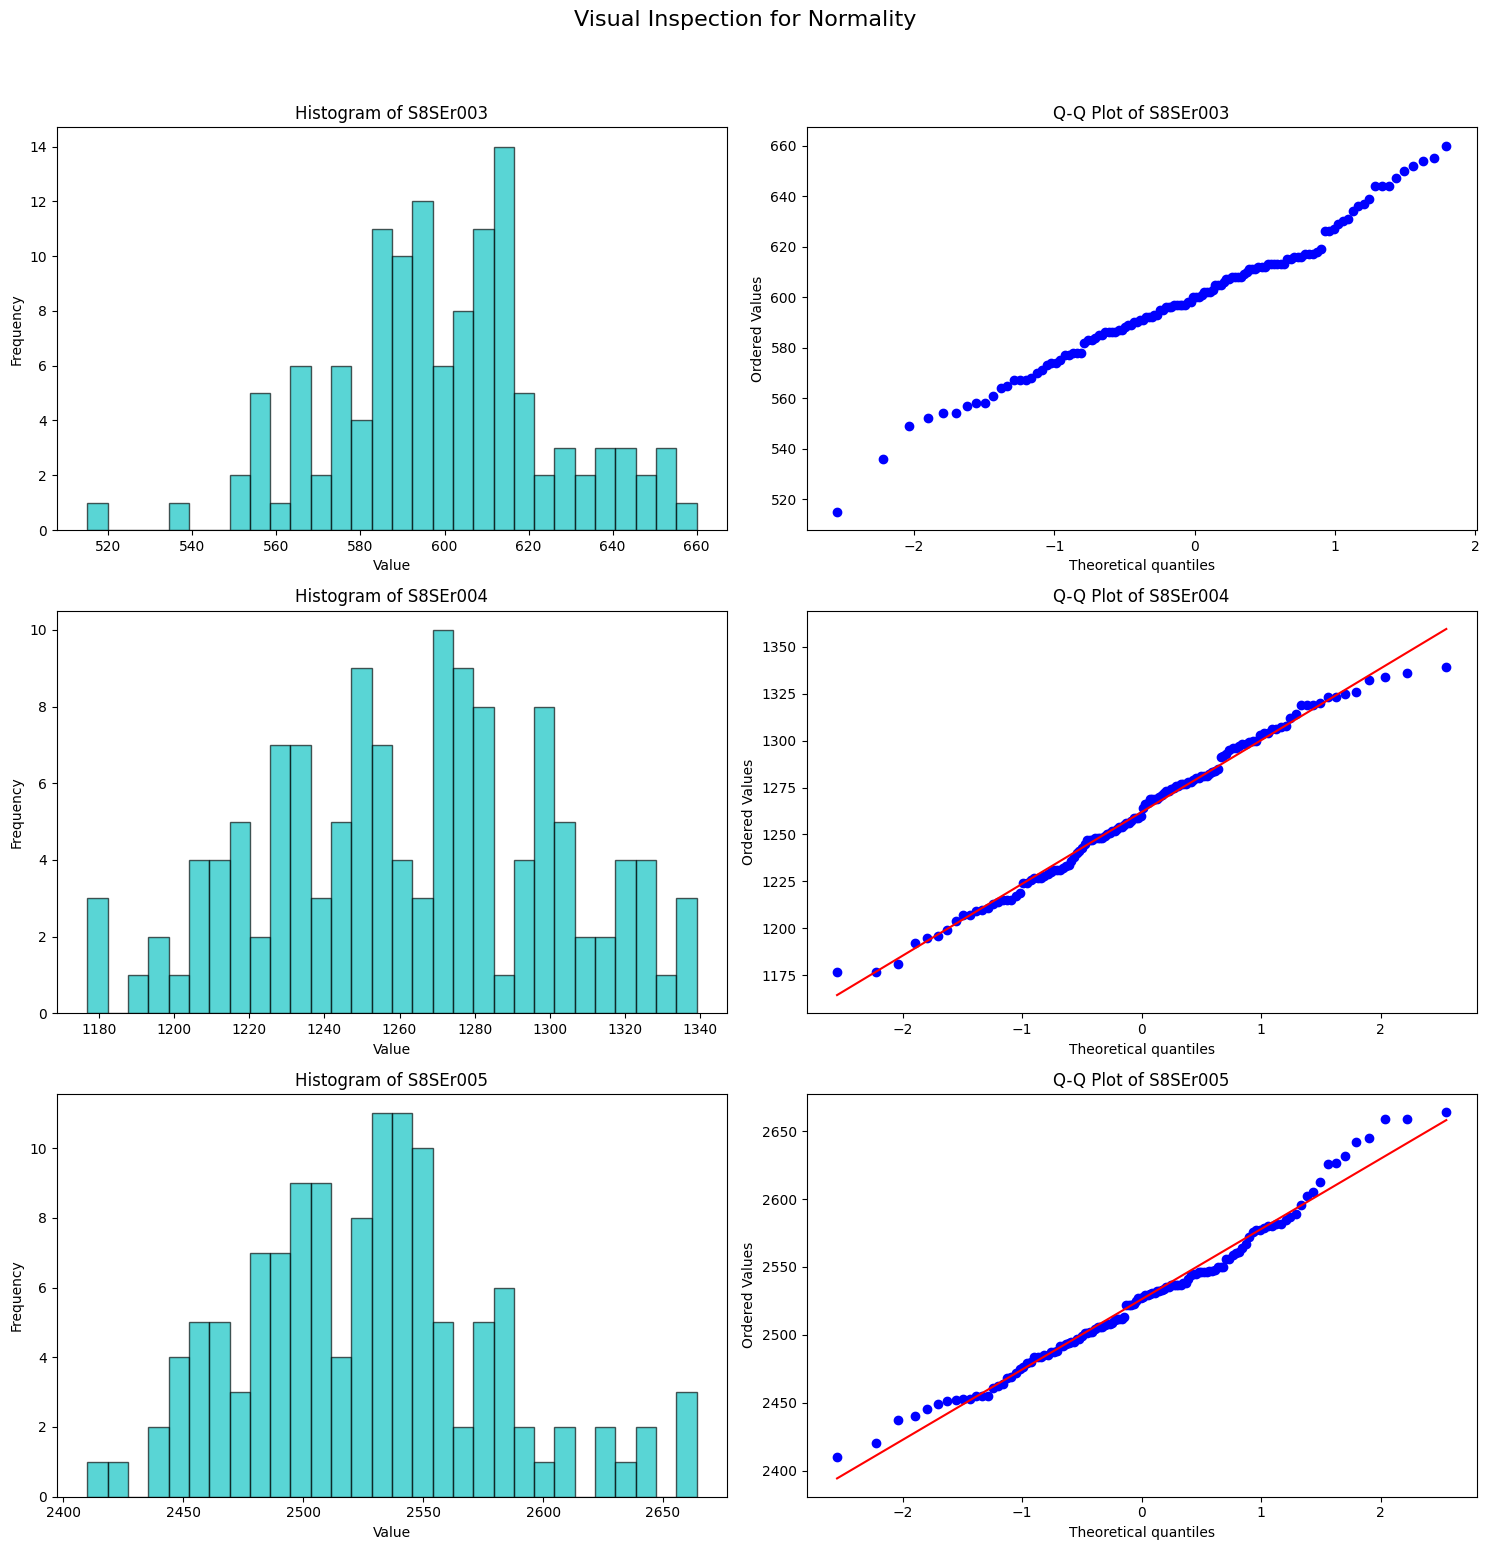

In [28]:
import scipy.stats as stats
# ヒストグラムとQ-Qプロットの描画
fig, axs = plt.subplots(len(columns_noab), 2, figsize=(15, 15))
fig.suptitle('Visual Inspection for Normality', fontsize=16, y=1.03)

for i, col in enumerate(columns_noab):
    # ヒストグラム
    axs[i, 0].hist(noab_data[col], bins=30, color='c', edgecolor='k', alpha=0.65)
    axs[i, 0].set_title(f'Histogram of {col}')
    axs[i, 0].set_xlabel('Value')
    axs[i, 0].set_ylabel('Frequency')
    
    # Q-Qプロット
    stats.probplot(noab_data[col], dist="norm", plot=axs[i, 1])
    axs[i, 1].set_title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()

### 統計的検証
シャピロ・ウィルク検定 (Shapiro-Wilk Test): サンプルサイズが小さい場合に特に推奨される検定．p-値が0.05よりも小さい場合，データは正規分布に従っていないと判断される．

In [31]:
import pandas as pd
import scipy.stats as stats
# 各カラムに対してシャピロ・ウィルク検定を実施
shapiro_results = {}
for col in columns_noab:
    data = noab_data[col]
    shapiro_stat, shapiro_p = stats.shapiro(data)
    shapiro_results[col] = {"Statistic": shapiro_stat, "p-value": shapiro_p}

shapiro_results


{'S8SEr003': {'Statistic': nan, 'p-value': 1.0},
 'S8SEr004': {'Statistic': 0.9871641397476196, 'p-value': 0.27501988410949707},
 'S8SEr005': {'Statistic': 0.980709969997406, 'p-value': 0.06507931649684906}}